# Smart Trading Agent
In this notebook, we predict cryptocurrency transaction based on five pieces of data:
- Timestamp (2018-05-01 00:00:00 - 2018-05-02 23:59:59)
- Price 
- Mid Price 
- Book Feature 
- Side (Sell / Buy)

<br/>

## Introduction
In this tutorial we will use the popular Deep Learning library, Keras, and the visualization libraries Matplotlib and Seaborn to build a classifying simple model. 
The libraries Numpy and Pandas will help us along the way

In [319]:
import pandas as pd

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('data/2018-05-newtrade.csv')

# Printing out the first 10 rows of our data
#data[:10]

## Visualization
We will now start thinking of which of these features we will use in our model.
First let's make a plot of our data to see how it looks. 
To visualize our data, we will use matplotlib and seaborn.

Intuitively, it makes sense that the price of BTC ('price') would play a big role in the customer consumption('side').
Let's see if these hypotheses are correct:

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
x = data.price.values
#sns.distplot(x, kde = True, rug = True)

In [321]:
#sns.violinplot(x='side', y='price', data=data)

Unfortunately, it is a bit hard to visualize prices since we have a lot of different samples. 

We found some 'curve' though. 
There are 2 peek points at about 0.99 and about 1.015. In this case, we seem 1.015 as the second peek-point ignoring 0.995, the actual second peek.
At these points, trader bought and sold BTC at high price.


Here we can see that ages on both ends of the spectrum seem to fare better, but we need to get a closer look. We will 'bin-ify' the ages, grouping them to bins according to their value. So, ages closer together will appear as one and it will be easier to visualize.

The function we will use will round the ages within a factor. To make our lives easier, we will use numpy.

In [322]:
import numpy as np

def make_bins(d, col, factor=2):
    rounding = lambda x: np.around(x / factor)
    d[col] = d[col].apply(rounding)
    return d

t = make_bins(data.copy(True), 'price', 100000)
#sns.barplot(x='price', y='side', data = t)

There doesn't seem to be much correlation to sell rate.

How about counts?

In [323]:
#sns.countplot(x='price', data = t)

It seems more clear that trader usually make highest numbers of transactions around 9,900,000 won. 
The number of transactions grows proportionally to around 99000000 won, since then it decreases. It returns to growth by around 1015000 won, but its counts are much smaller than before.

### conclusion 1:
Main trade price of May 2018 is about 9,900,000 won and most trades are under 10,100,000 won.


Now to check the book feature:

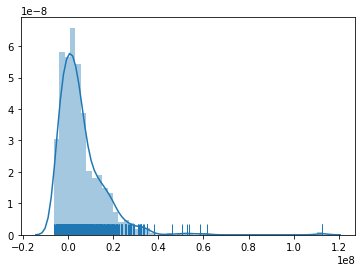

In [324]:
x = data.book_feature.values
#sns.distplot(x, kde = True, rug = True)

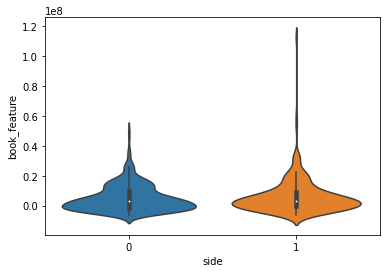

In [325]:
#sns.violinplot(x='side', y='book_feature', data=data)

It's definitely skewed. 
Let's make it more specific.

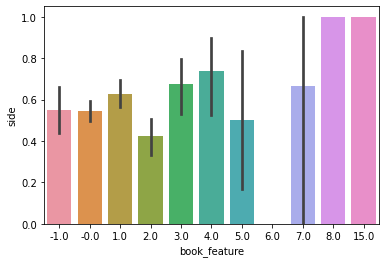

In [326]:
t = make_bins(data.copy(True), 'book_feature', 7500000)
#sns.barplot(x='book_feature', y='side', data = t)

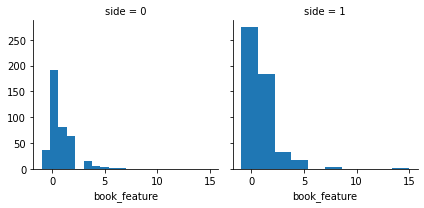

In [327]:
g = sns.FacetGrid(t, col='side')
#g.map(plt.hist, 'book_feature', bins = 10)

There doesn't seem to be much correlation to sell rate (side = 1).


Let's separate two parts, positive numbers and negative numbers.

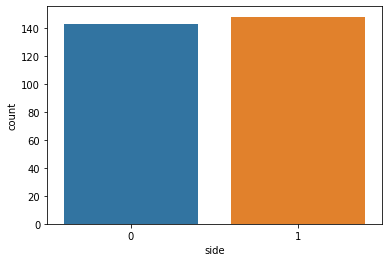

In [328]:
nf = data[data['book_feature'] < 0]
#sns.countplot(x='side', data = nf)

It seems almost 50:50

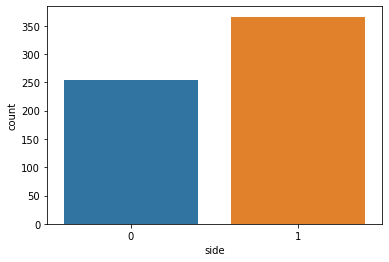

In [329]:
pf = data[data['book_feature'] > 0]
#sns.countplot(x='side', data = pf)

If book feature is positive, trader prefers to sell BTC.
Total counts of positive book features are almost 600. It is about 65% of total trades and 70% of total sells.
'book feature' is the difference in total-market-customer's average requested price and total-market-customer's top request price.

### conclusion 2
When book feature is negative, it doesn't seriously effect to trader's decision (buy or sell) and when it's positive, trader prefers to sell little bit more.

Book feature doesn't be seemed serious until now though.

Let's think about correlation among trade information. The standard will be always 'price'.
- Price x Mid Price
- Price x Book Feature
- Price x side (buy / sell)

For the first time, we will consider transaction time.
- Price x Timestamp

How about realationship between columns
price x mid price
price x book feature

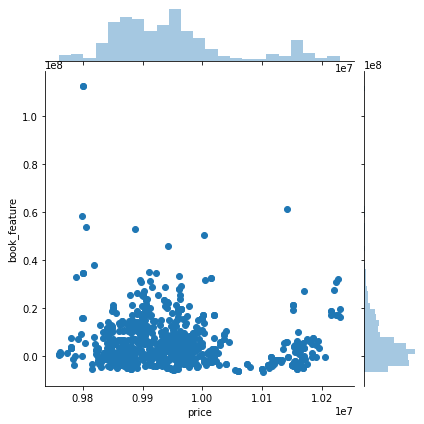

In [330]:
#sns.jointplot(x='price', y='mid_price', data = data)

sns.jointplot(x='price', y='book_feature', data = data)

In [331]:
data_rank1 = data[data["price"]<10000000]



In [332]:

data_rank2 = data[data["price"]>10000000]


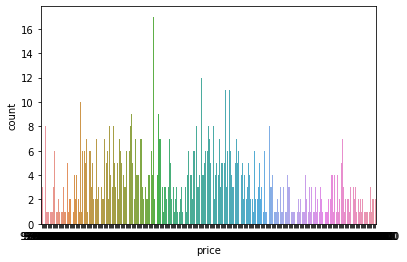

In [333]:
sns.countplot(x='price', data=data) 